In [1]:
#Create a graph from graph.csv and load the contents from content.csv.
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
graph_file = 'graph.csv'
graph_data = pd.read_csv(graph_file)

In [3]:
if not {'Source', 'Target'}.issubset(graph_data.columns):
    raise ValueError("graph.csv must contain 'Source' and 'Target' columns.")

In [4]:
G = nx.from_pandas_edgelist(graph_data, source='Source', target='Target', create_using=nx.DiGraph())

In [13]:
content_file = 'content.csv'
content_data = pd.read_csv(content_file)

In [14]:
if 'Node' in content_data.columns:
    for _, row in content_data.iterrows():
        node = row['Node']
        attributes = row.drop('Node').to_dict()
        if node in G:
            nx.set_node_attributes(G, {node: attributes})

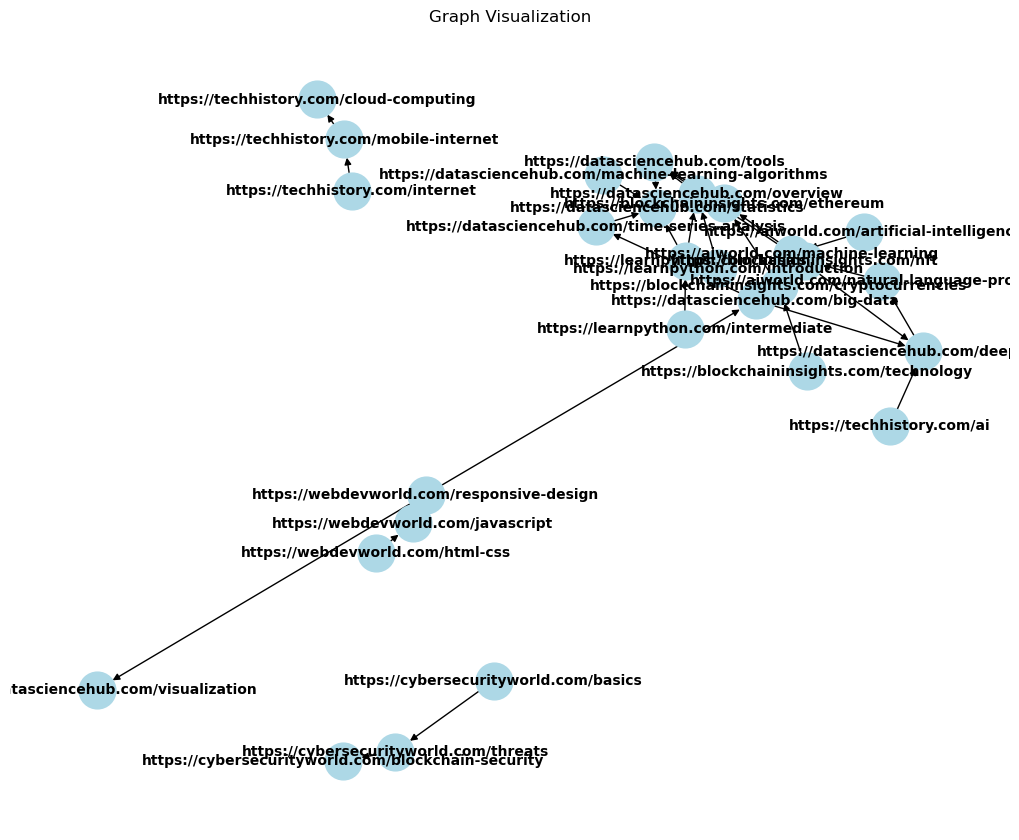

In [17]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold')
plt.title("Graph Visualization")
plt.show()

In [112]:
#Create a figure of the graph using networkx libary.
import matplotlib.pyplot as plt
import networkx as nx

In [114]:
documents = {
    1: "The quick brown fox jumps over the lazy dog.",
    2: "The lazy dog sleeps all day.",
    3: "The fox is quick and clever.",
    4: "A dog and a fox are friends."
}

In [116]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return set(text.split())  # 

In [118]:
def build_inverted_index(documents):
    inverted_index = {}
    for doc_id, text in documents.items():
        words = preprocess_text(text)
        for word in words:
            if word not in inverted_index:
                inverted_index[word] = set()
            inverted_index[word].add(doc_id)
    return inverted_index

In [120]:
inverted_index = build_inverted_index(documents)

In [122]:
G = nx.Graph()

In [124]:
for doc_id in documents.keys():
    G.add_node(f"Doc{doc_id}", type="document")
for word in inverted_index.keys():
    G.add_node(word, type="word")

In [126]:
for word, doc_ids in inverted_index.items():
    for doc_id in doc_ids:
        G.add_edge(f"Doc{doc_id}", word)

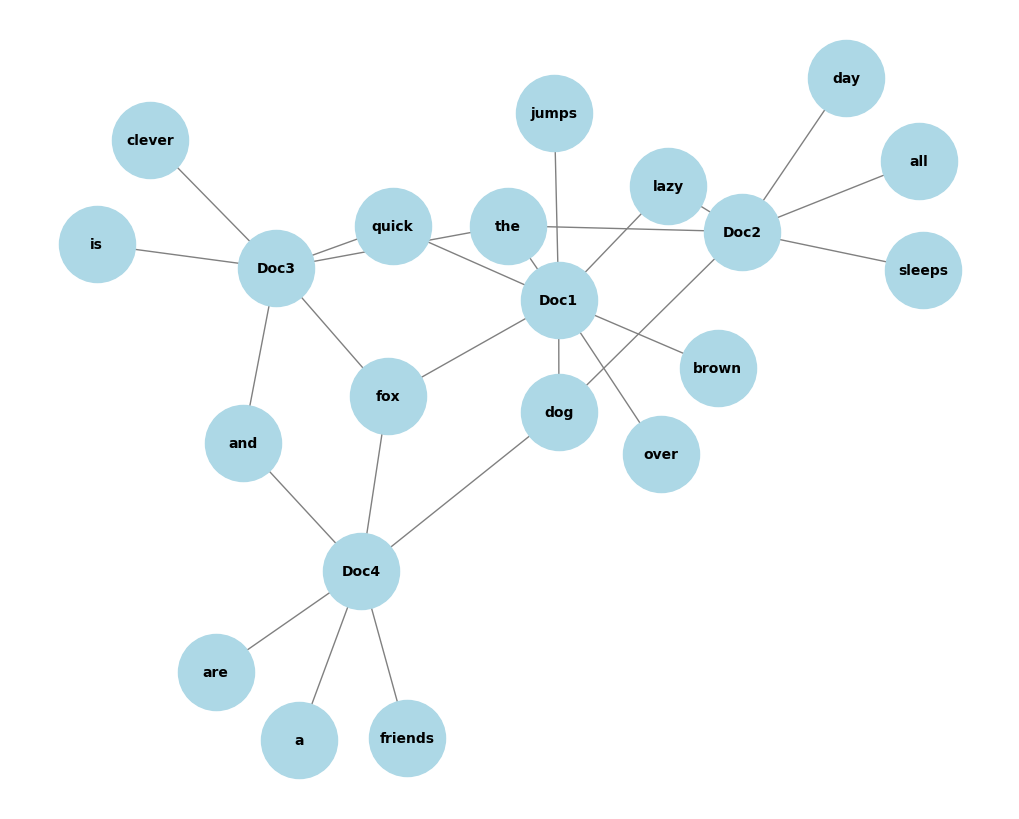

In [128]:
pos = nx.spring_layout(G)  # Layout for the graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')

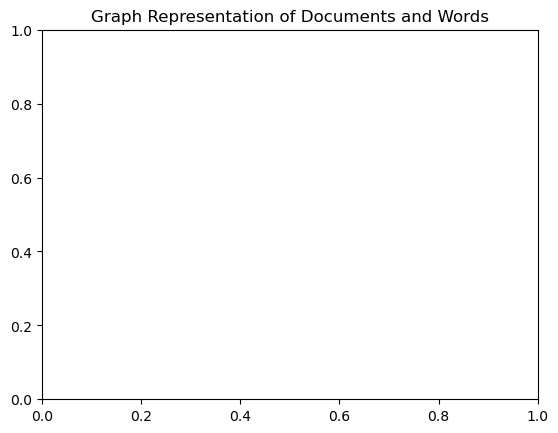

In [130]:
plt.title("Graph Representation of Documents and Words")
plt.show()

In [ ]:
#Tokenize the contents, and remove words
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import networkx as nx
import matplotlib.pyplot as plt

In [47]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [48]:
graph_file = 'graph.csv'
graph_data = pd.read_csv(graph_file)

In [50]:
if not {'Source', 'Target'}.issubset(graph_data.columns):
    raise ValueError("graph.csv must contain 'Source' and 'Target' columns.")

In [51]:
G = nx.from_pandas_edgelist(graph_data, source='Source', target='Target', create_using=nx.DiGraph())

In [52]:
content_file = 'content.csv'
content_data = pd.read_csv(content_file)

In [53]:
if 'Text' in content_data.columns:
    stop_words = set(stopwords.words('english'))
    
    def clean_text(text):
        tokens = word_tokenize(text)
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalnum()]
        return ' '.join(filtered_tokens)
    
    content_data['Cleaned_Text'] = content_data['Text'].apply(clean_text)

In [54]:
if 'Node' in content_data.columns:
    for _, row in content_data.iterrows():
        node = row['Node']
        attributes = row.drop('Node').to_dict()
        if node in G:
            nx.set_node_attributes(G, {node: attributes})

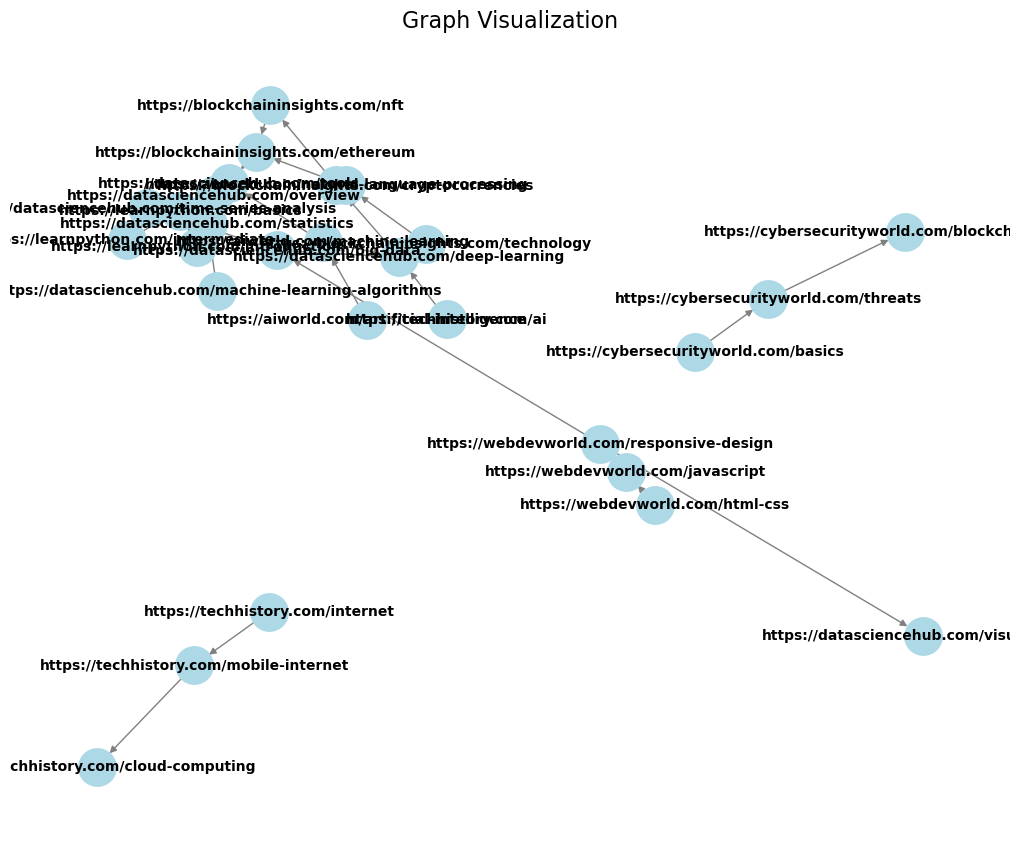

In [55]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Layout for visualization
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=700,
    node_color='lightblue',
    font_size=10,
    font_weight='bold',
    edge_color='gray',
    linewidths=1.5
)
plt.title("Graph Visualization", fontsize=16)
plt.show()

In [65]:
#Build an inverted index
inverted_index = {}
if 'Cleaned_Text' in content_data.columns and 'Node' in content_data.columns:
    for _, row in content_data.iterrows():
        node = row['Node']
        words = row['Cleaned_Text'].split()
        for word in words:
            if word not in inverted_index:
                inverted_index[word] = set()
            inverted_index[word].add(node)

In [67]:
inverted_index = {key: list(value) for key, value in inverted_index.items()}

In [69]:
if 'Node' in content_data.columns:
    for _, row in content_data.iterrows():
        node = row['Node']
        attributes = row.drop('Node').to_dict()
        if node in G:
            nx.set_node_attributes(G, {node: attributes})

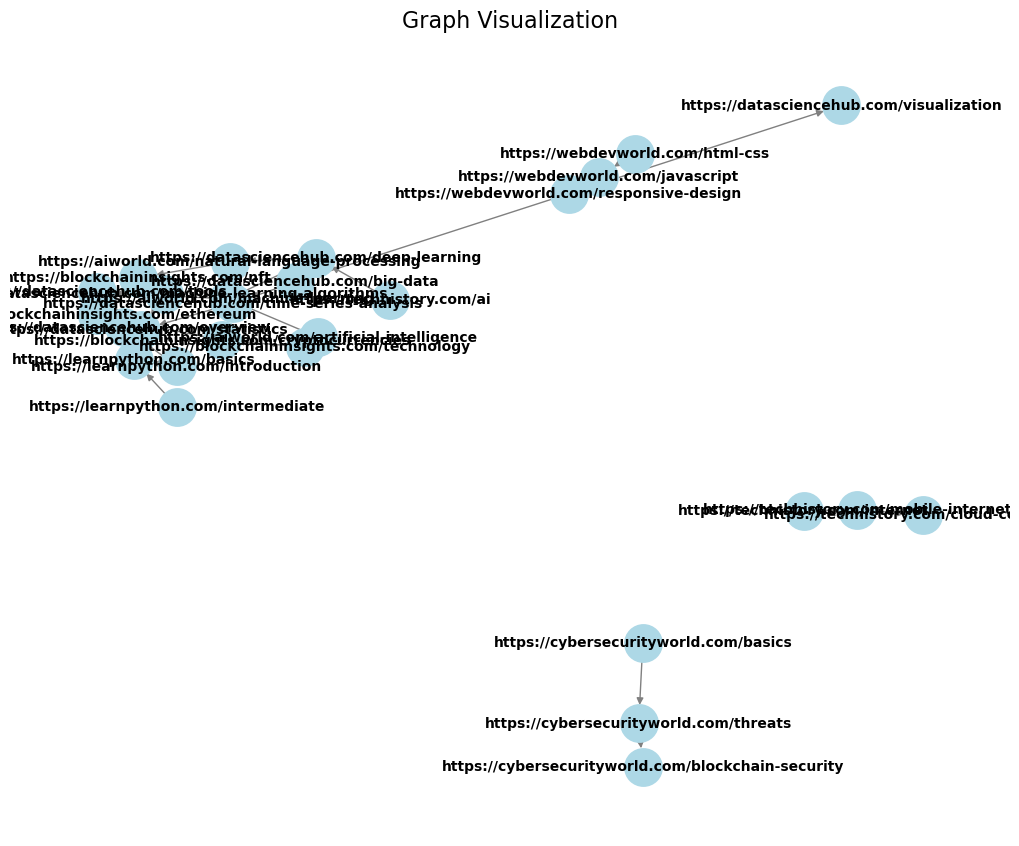

In [71]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Layout for visualization
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=700,
    node_color='lightblue',
    font_size=10,
    font_weight='bold',
    edge_color='gray',
    linewidths=1.5
)
plt.title("Graph Visualization", fontsize=16)
plt.show()

In [74]:
# Build a search system for single-word queries
def search(query):
    query = query.lower()
    if query in inverted_index:
        # Get matching nodes
        matching_nodes = inverted_index[query]
        # Rank nodes using PageRank
        pagerank_scores = nx.pagerank(G)
        ranked_nodes = sorted(matching_nodes, key=lambda node: pagerank_scores.get(node, 0), reverse=True)
        return ranked_nodes
    else:
        return []

In [76]:
query = "example"  # Replace with your search term
results = search(query)
print(f"Search results for '{query}':", results)

Search results for 'example': []


In [78]:
if 'Node' in content_data.columns:
    for _, row in content_data.iterrows():
        node = row['Node']
        attributes = row.drop('Node').to_dict()
        if node in G:
            nx.set_node_attributes(G, {node: attributes})

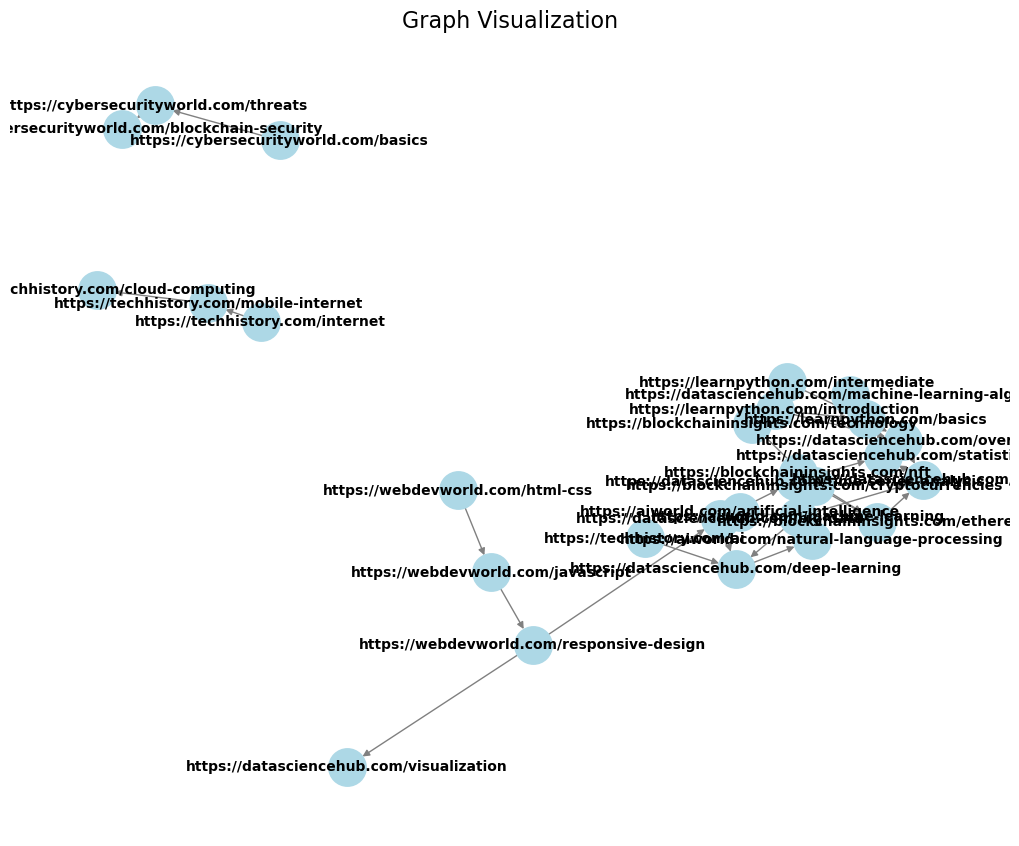

In [80]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Layout for visualization
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=700,
    node_color='lightblue',
    font_size=10,
    font_weight='bold',
    edge_color='gray',
    linewidths=1.5
)
plt.title("Graph Visualization", fontsize=16)
plt.show()

In [82]:
#Implement a bag of word query based search system
import string

In [84]:
documents = {
    1: "The quick brown fox jumps over the lazy dog.",
    2: "The lazy dog sleeps all day.",
    3: "The fox is quick and clever.",
    4: "A dog and a fox are friends."
}

In [86]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return set(text.split())

In [88]:
def build_inverted_index(documents):
    inverted_index = {}
    for doc_id, text in documents.items():
        words = preprocess_text(text)
        for word in words:
            if word not in inverted_index:
                inverted_index[word] = set()
            inverted_index[word].add(doc_id)
    return inverted_index

In [90]:
def search(query, inverted_index):
    query_words = query.lower().split()
    result = set()
    
    for word in query_words:
        if word in inverted_index:
            result.update(inverted_index[word])
    
    return result

In [92]:
inverted_index = build_inverted_index(documents)

In [94]:
query = "quick dog"

In [96]:
result_docs = search(query, inverted_index)

print(f"Documents matching the query '{query}': {result_docs}")

Documents matching the query 'quick dog': {1, 2, 3, 4}
